In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/mamunds/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
# =========================
# 1. LOAD DATA
# =========================

# Adjust paths as needed (e.g. './orders_data.csv')
orders = pd.read_csv("/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/orders_data.csv")
products = pd.read_csv("/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/products_data.csv")


In [4]:
# =========================
# 2. PARSE DATES
# =========================

def parse_shopify_ts(s):
    # timestamps look like '2019-12-03 13:08:33 UTC'
    if pd.isna(s):
        return pd.NaT
    return pd.to_datetime(s.replace(" UTC", ""))



In [5]:
orders["processed_at"] = orders["processed_at"].apply(parse_shopify_ts)
orders["created_at"] = orders["created_at"].apply(parse_shopify_ts)
orders["first_date_order"] = orders["first_date_order"].apply(parse_shopify_ts)


In [6]:
orders.head(5)

,billing_address_country,billing_address_zip,customer_id,order_number,total_discounts,cancel_reason,processed_at,total_weight,cancelled_at,created_at,product_items,first_date_order
0,Germany,81371,43539353630,1,0,customer,2019-12-03 13:08:32,0,2019-12-04 09:00:44 UTC,2019-12-03 13:08:33,Golf_set_with_caddy_shoes_and_50_balls,2019-12-03 13:08:33
1,Germany,12045,43973434860,2,0,customer,2019-12-04 09:23:09,0,2020-01-20 14:55:25 UTC,2019-12-04 09:23:09,Golf_set_with_caddy_shoes_and_50_balls,2019-12-04 09:23:09
2,Germany,8315,46668580946,3,0,NaN,2019-12-06 07:58:34,0,NaN,2019-12-06 07:58:34,Golf_set_with_caddy_shoes_and_50_balls,2019-12-06 07:58:34
3,Germany,91301,40345377076,4,0,NaN,2019-12-06 18:29:03,0,NaN,2019-12-06 18:29:04,Golf_set_with_caddy_shoes_and_50_balls,2019-12-06 18:29:04
4,Germany,8577,33355469588,5,0,NaN,2019-12-08 18:16:40,0,NaN,2019-12-08 18:16:40,Golf_set_with_caddy_shoes_and_50_balls,2019-12-08 18:16:40


In [11]:
# ================================================================
# 2. BASIC INFO & STRUCTURE
# ================================================================
print("Orders shape:", orders.shape)
print("Products shape:", products.shape)

print("\nOrders Info:")
orders.info()

print("\nProducts Info:")
products.info()


Orders shape: (189140, 18)
Products shape: (58, 4)

Orders Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189140 entries, 0 to 189139
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   billing_address_country  189138 non-null  object        
 1   billing_address_zip      189126 non-null  object        
 2   customer_id              189140 non-null  int64         
 3   order_number             189140 non-null  int64         
 4   total_discounts          189140 non-null  int64         
 5   cancel_reason            1586 non-null    object        
 6   processed_at             189140 non-null  datetime64[ns]
 7   total_weight             189140 non-null  int64         
 8   cancelled_at             1586 non-null    object        
 9   created_at               189140 non-null  datetime64[ns]
 10  product_items            189140 non-null  object        
 11  first_date_or

In [12]:
# ================================================================
# 3. MISSING VALUES
# ================================================================
print("\nMissing values in Orders:")
print(orders.isna().sum())

print("\nMissing values in Products:")
print(products.isna().sum())



Missing values in Orders:
billing_address_country         2
billing_address_zip            14
customer_id                     0
order_number                    0
total_discounts                 0
cancel_reason              187554
processed_at                    0
total_weight                    0
cancelled_at               187554
created_at                      0
product_items                   0
first_date_order                0
order_value                     0
cohort_month                    0
order_month                     0
period_number                   0
first_order_date                0
is_new_customer                 0
dtype: int64

Missing values in Products:
product_type        0
product_price       0
product_category    0
product_title       0
dtype: int64


In [ ]:
# ================================================================
# 4. DESCRIPTIVE STATISTICS
# # ================================================================
# orders_desc = orders.describe(include="all", datetime_is_numeric=True)
# products_desc = products.describe(include="all", datetime_is_numeric=True)

# orders_desc, products_desc


TypeError: NDFrame.describe() got an unexpected keyword argument 'datetime_is_numeric'

In [16]:
# ================================================================
# 5. TIMESTAMP CLEANING
# ================================================================
def parse_shopify_ts(s):
    if pd.isna(s):
        return pd.NaT
    if not isinstance(s, str):
        return pd.to_datetime(s, errors="coerce")
    return pd.to_datetime(s.replace(" UTC", ""), errors="coerce")

date_columns = ["created_at", "processed_at", "first_date_order"]
for col in date_columns:
    if col in orders.columns:
        orders[col] = orders[col].apply(parse_shopify_ts)

# Extract useful time features
orders["order_date"] = orders["created_at"].dt.date
orders["order_month"] = orders["created_at"].dt.to_period("M")

orders[["created_at", "processed_at", "first_date_order"]].head()


,created_at,processed_at,first_date_order
0,2019-12-03 13:08:33,2019-12-03 13:08:32,2019-12-03 13:08:33
1,2019-12-04 09:23:09,2019-12-04 09:23:09,2019-12-04 09:23:09
2,2019-12-06 07:58:34,2019-12-06 07:58:34,2019-12-06 07:58:34
3,2019-12-06 18:29:04,2019-12-06 18:29:03,2019-12-06 18:29:04
4,2019-12-08 18:16:40,2019-12-08 18:16:40,2019-12-08 18:16:40


Earliest order: 2019-12-03 13:08:33
Latest order: 2021-03-08 19:02:17


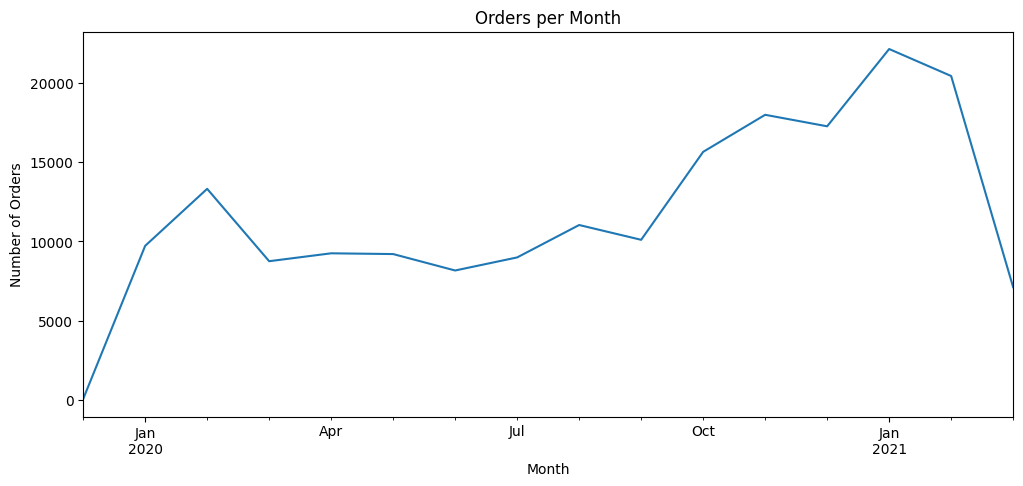

In [17]:
# ================================================================
# 6. BASIC TIME ANALYSIS
# ================================================================
print("Earliest order:", orders["created_at"].min())
print("Latest order:", orders["created_at"].max())

orders_per_month = orders.groupby("order_month").size()

plt.figure(figsize=(12, 5))
orders_per_month.index = orders_per_month.index.to_timestamp()
orders_per_month.plot()
plt.title("Orders per Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()


In [18]:
# ================================================================
# 7. CUSTOMER-LEVEL ANALYSIS
# ================================================================
customer_id = "customer_id"

# Orders per customer
customer_orders = (
    orders.groupby(customer_id)
    .agg(n_orders=("order_number", "count"))
)

customer_orders.head()


,n_orders
customer_id,
774340,1
3874068,1
8089334,1
9443660,2
9830338,2


Repurchase rate: 16.16 %


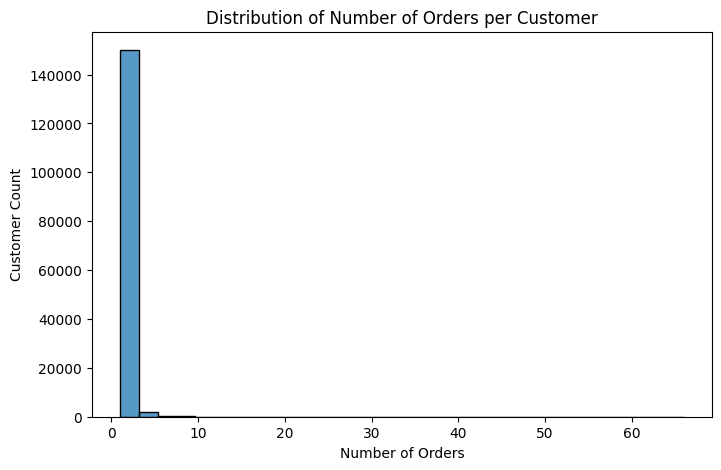

In [20]:
import seaborn as sns
# Repurchase rate
repurchase_rate = (customer_orders["n_orders"] > 1).mean()
print("Repurchase rate:", round(repurchase_rate * 100, 2), "%")

# Distribution plot
plt.figure(figsize=(8,5))
sns.histplot(customer_orders["n_orders"], bins=30, kde=False)
plt.title("Distribution of Number of Orders per Customer")
plt.xlabel("Number of Orders")
plt.ylabel("Customer Count")
plt.show()


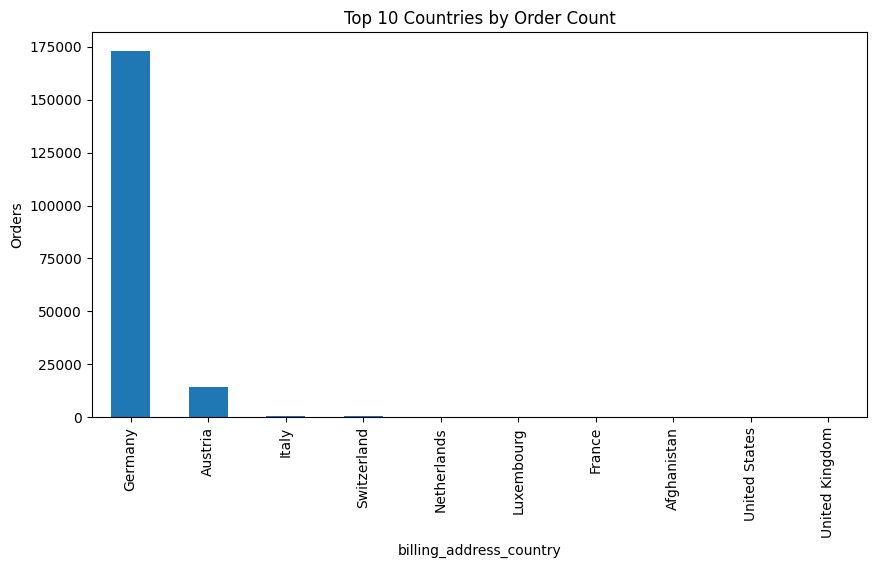

billing_address_country
Germany           173207
Austria            14153
Italy                615
Switzerland          538
Netherlands          164
Luxembourg           133
France                85
Afghanistan           49
United States         39
United Kingdom        29
Name: count, dtype: int64

In [21]:
# ================================================================
# 8. COUNTRY ANALYSIS
# ================================================================
country_counts = orders["billing_address_country"].value_counts()

plt.figure(figsize=(10,5))
country_counts.head(10).plot(kind="bar")
plt.title("Top 10 Countries by Order Count")
plt.ylabel("Orders")
plt.show()

country_counts.head(10)


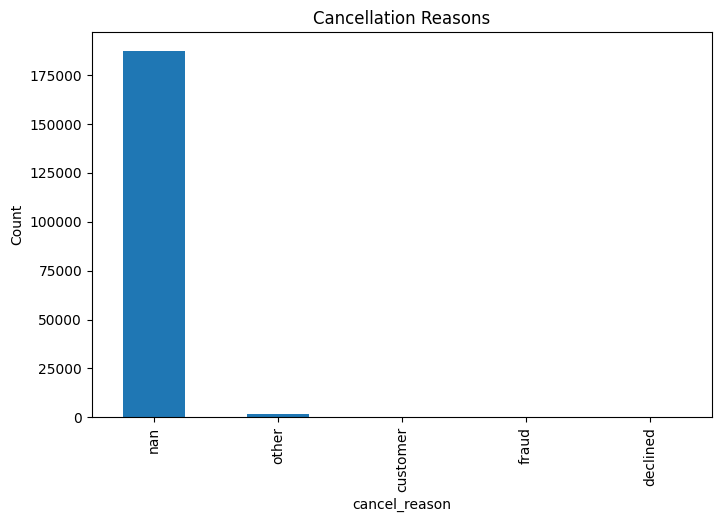

cancel_reason
NaN         187554
other         1460
customer       124
fraud            1
declined         1
Name: count, dtype: int64

In [22]:
# ================================================================
# 9. CANCELLATION ANALYSIS
# ================================================================
cancel_counts = orders["cancel_reason"].value_counts(dropna=False)

plt.figure(figsize=(8,5))
cancel_counts.plot(kind="bar")
plt.title("Cancellation Reasons")
plt.ylabel("Count")
plt.show()

cancel_counts


In [23]:
# ================================================================
# 10. PRODUCT ANALYSIS (High-Level)
# ================================================================
print("Number of unique product_items in orders:", orders["product_items"].nunique())
print("Most common product:", orders["product_items"].value_counts().idxmax())


Number of unique product_items in orders: 6710
Most common product: Golf_set_with_caddy_and_100_balls


In [24]:
# ================================================================
# 11. SAVE CLEANED DATA (Optional)
# ================================================================
orders.to_csv("orders_cleaned.csv", index=False)
print("Saved cleaned dataset to orders_cleaned.csv")


Saved cleaned dataset to orders_cleaned.csv


In [7]:
# =========================
# 3. REVENUE PER ORDER
# =========================

# Build price map from products table
price_map = products.groupby("product_title")["product_price"].mean().to_dict()

def compute_order_value(items_str):
    if pd.isna(items_str):
        return 0.0
    titles_list = [p.strip() for p in items_str.split(",") if p.strip()]
    return sum(price_map.get(t, 0.0) for t in titles_list)

orders["order_value"] = orders["product_items"].apply(compute_order_value)

In [8]:
# =========================
# 4. COHORT ANALYSIS (Task 2a)
# =========================

# Cohort month = month of first order
orders["cohort_month"] = orders["first_date_order"].values.astype("datetime64[M]")
orders["order_month"] = orders["processed_at"].values.astype("datetime64[M]")

# Months since cohort
orders["period_number"] = (
    (orders["order_month"].dt.year - orders["cohort_month"].dt.year) * 12
    + (orders["order_month"].dt.month - orders["cohort_month"].dt.month)
)

# Cohort sizes (# of customers per cohort)
cohort_sizes = (
    orders.groupby("cohort_month")["customer_id"]
    .nunique()
    .rename("cohort_size")
)

# Active customers per cohort & period
cohort_pivot_counts = (
    orders.groupby(["cohort_month", "period_number"])["customer_id"]
    .nunique()
    .rename("active_customers")
    .reset_index()
    .merge(cohort_sizes.reset_index(), on="cohort_month", how="left")
)

cohort_pivot_counts["retention_rate"] = (
    cohort_pivot_counts["active_customers"] /
    cohort_pivot_counts["cohort_size"]
)

# Retention matrix
cohort_retention_matrix = cohort_pivot_counts.pivot(
    index="cohort_month",
    columns="period_number",
    values="retention_rate"
).sort_index()

# Repurchase rate per cohort: share of customers with >= 2 orders
customer_order_counts = (
    orders.groupby(["cohort_month", "customer_id"])["order_number"]
    .nunique()
    .rename("n_orders")
)

repurchase = (
    customer_order_counts
    .reset_index()
    .assign(repurchase=lambda df: df["n_orders"] > 1)
    .groupby("cohort_month")["repurchase"]
    .mean()
)

print("Repurchase rate per cohort (fraction):")
print(repurchase)


Repurchase rate per cohort (fraction):
cohort_month
2019-12-01    0.150000
2020-01-01    0.155931
2020-02-01    0.159498
2020-03-01    0.145944
2020-04-01    0.127502
2020-05-01    0.145961
2020-06-01    0.184879
2020-07-01    0.211573
2020-08-01    0.265941
2020-09-01    0.271215
2020-10-01    0.243330
2020-11-01    0.189757
2020-12-01    0.141831
2021-01-01    0.098919
2021-02-01    0.042963
2021-03-01    0.020991
Name: repurchase, dtype: float64


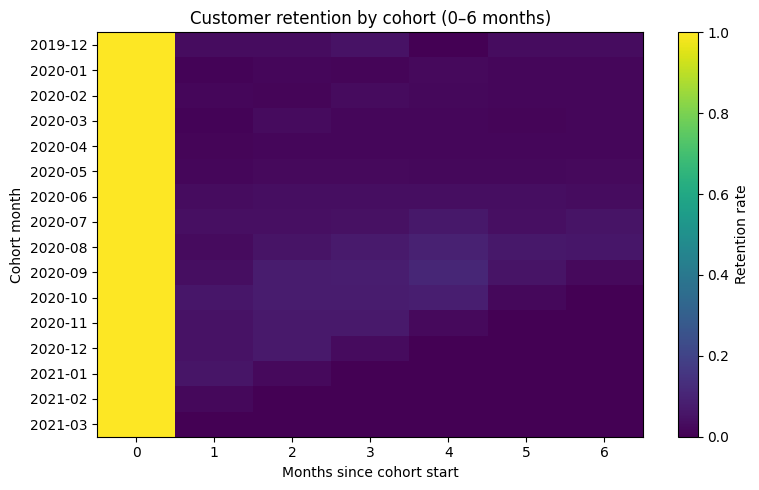

In [9]:
# ----- Cohort heatmap (0–6 months) -----
max_period = 6
retention_0_6 = cohort_retention_matrix.loc[:, 0:max_period]

fig, ax = plt.subplots(figsize=(8, 5))
im = ax.imshow(retention_0_6.fillna(0).values, aspect="auto")

ax.set_xticks(range(retention_0_6.shape[1]))
ax.set_xticklabels(retention_0_6.columns)
ax.set_xlabel("Months since cohort start")

ax.set_yticks(range(retention_0_6.shape[0]))
ax.set_yticklabels([d.strftime("%Y-%m") for d in retention_0_6.index])
ax.set_ylabel("Cohort month")

ax.set_title("Customer retention by cohort (0–6 months)")
plt.colorbar(im, ax=ax, label="Retention rate")
plt.tight_layout()
plt.show()


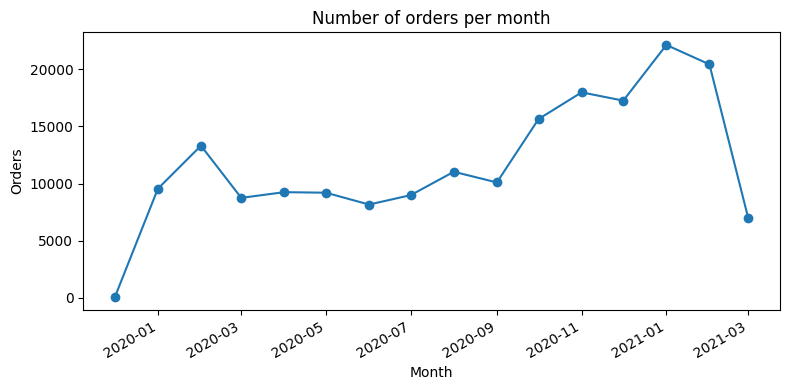

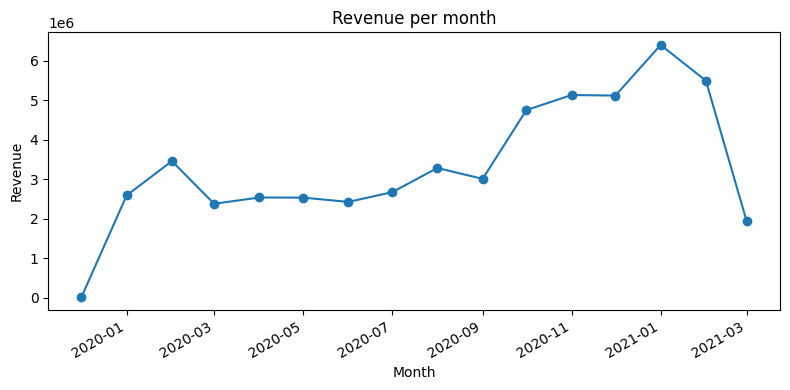

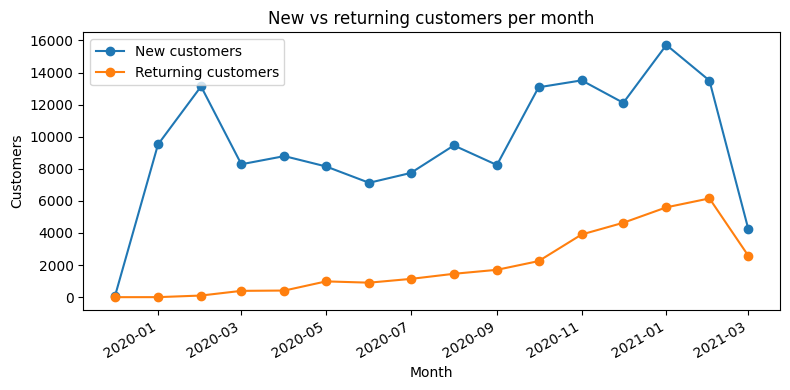

Revenue by product category:
product_category
golf                  31791620.80
multi_sport_bundle    10121472.95
tennis                 7607237.90
accessoires            1731631.62
football               1397055.51
swimming               1111560.24
Name: product_price, dtype: float64


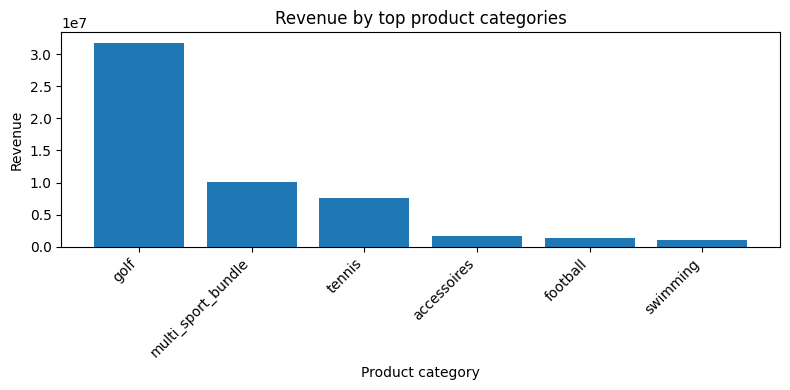

In [10]:
# =========================
# 5. BUSINESS KPIs (Task 2b)
# =========================

# Monthly KPI aggregation
orders["order_month"] = orders["processed_at"].values.astype("datetime64[M]")

monthly = (
    orders.groupby("order_month")
    .agg(
        n_orders=("order_number", "nunique"),
        revenue=("order_value", "sum"),
        n_customers=("customer_id", "nunique"),
    )
    .reset_index()
)

# Plot: Orders per month
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(monthly["order_month"], monthly["n_orders"], marker="o")
ax.set_title("Number of orders per month")
ax.set_xlabel("Month")
ax.set_ylabel("Orders")
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# Plot: Revenue per month
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(monthly["order_month"], monthly["revenue"], marker="o")
ax.set_title("Revenue per month")
ax.set_xlabel("Month")
ax.set_ylabel("Revenue")
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# =========================
# 6. NEW VS RETURNING CUSTOMERS
# =========================

first_order_per_customer = (
    orders.groupby("customer_id")["processed_at"]
    .min()
    .rename("first_order_date")
)

orders = orders.merge(first_order_per_customer, on="customer_id", how="left")

orders["is_new_customer"] = (
    orders["processed_at"].dt.to_period("M") ==
    orders["first_order_date"].dt.to_period("M")
)

new_returning = (
    orders.groupby(["order_month", "is_new_customer"])["customer_id"]
    .nunique()
    .rename("n_customers")
    .reset_index()
)

pivot_nr = new_returning.pivot(
    index="order_month",
    columns="is_new_customer",
    values="n_customers"
).fillna(0)

pivot_nr.columns = ["returning_customers", "new_customers"]  # False, True

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(pivot_nr.index, pivot_nr["new_customers"], marker="o", label="New customers")
ax.plot(pivot_nr.index, pivot_nr["returning_customers"], marker="o", label="Returning customers")
ax.set_title("New vs returning customers per month")
ax.set_xlabel("Month")
ax.set_ylabel("Customers")
ax.legend()
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# =========================
# 7. REVENUE BY PRODUCT CATEGORY
# =========================

def explode_products(df):
    df = df.copy()
    df["product_title"] = df["product_items"].str.split(",")
    df = df.explode("product_title")
    df["product_title"] = df["product_title"].str.strip()
    return df

orders_exploded = explode_products(orders)

orders_exploded = orders_exploded.merge(
    products[["product_title", "product_category", "product_price"]].drop_duplicates(),
    on="product_title",
    how="left",
)

category_revenue = (
    orders_exploded.groupby("product_category")["product_price"]
    .sum()
    .sort_values(ascending=False)
)

print("Revenue by product category:")
print(category_revenue)

top_cat = category_revenue.head(10)

fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(top_cat.index, top_cat.values)
ax.set_title("Revenue by top product categories")
ax.set_xlabel("Product category")
ax.set_ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()